# Visualization Technique

## Bubble Plots - what are they?

Bubble plots are a more "advanced" version of the well-known scatter plot.
Here is an example of a scatter plot.

![scatter plot example](scatter-plot-example-1.png)

As you can see, scatter plots visually tell us the correlation / relationship between two variables, the independent variable on the x-axis and the dependent one on the y-axis. Whenever we have a piece of data that belongs in those axis, we plot them as a dot as shown. Now let's see what a bubble plot is compared to the scatter plot.

![bubble plot example](bubble_chart.png)

Bubble plots show us not only the x and y dimension of data, but also the third dimension z, which is the weight of those data points, represented by the size of the circle as shown in the example above. Bubble plots utilize the Cartesian plane to show the relationships between the circles. Unlike scatter plots, the plotted points in bubble plots represent assigned labels or categories, and sometimes different colors are also used to distinguish between them. The overall plot can be used to determine patterns and trends in the data.

## When to use it

Bubble plots are designed to visually convey three or four dimensions of data. It is a good idea to use bubble plots when you have such data that you want to convey all information graphically all at once. Moreover, as it is fundamentally a scatter plot with different plot sizes, it is also good to use it to convey relationships and correlation between those data points as well.

## When not to use it

The first mistake for choosing a bubble plot to display data is when such data can be explained better in terms of a pie chart. This means that if your data contains more dimensions than four, it is not advisable to crunch your data graphically into a bubble plot. The result of this can be confusion and incorrect analysis of data. Moreover, if many bubbles are included in the plot, this may overwhelm the audience, and so bubble plots usually have limited data size capacity.

# Visualization Library

## Seaborn

For this task, Seaborn is chosen as the library used to display our bubble plot. As quoted from their website:

```"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."```

It is built on top of matplotlib and integrates very well with the Pandas library, which will be used to store tabular data. Seaborn allows declarative API that allows the user to control the elements of the plots with minimal setup, producing beautiful plots that are usually enough for people to interpret data. The library is developed by Michael Waskom in 2014 and is open-source. It includes built-in themes for styling informative data plots. 

The reason this library is chosen is because it provides easy-to-use APIs that integrate well with Pandas which produce results that are beautiful with not much effort to style the graph. It also integrates with Jupyter, showing graphs in-line.

## Installation

To install, simply run the following command from your favorite package manager

If you use PyPI: ```pip install seaborn```

If you use Anaconda: ```conda install seaborn```

## Dependencies

Python 3.6+

## Required dependencies

If not already present, these libraries will be downloaded when you install seaborn.

- numpy

- scipy

- pandas

- matplotlib

## Importing the library

In [1]:
import seaborn as sns

# Dataset

## Selecting Dataset

Before we begin, a bubble plot needs at least 3 or 4 dimensions to display data visually. I have selected the following dataset for this task.

https://www.gapminder.org/data/

The above site contains dataset for populations of each country and many more information related to the population. For the sake of this demo, we would like to graphically display the following information, and analyze if there is a relationship between the data. We would like to explore if there is a relationship between income (gdp per capita) and time. In addition, we would also like to explore if there is a trend between income and life expectancy. Graphically, we will convert those data to a bubble plot to visually understand those data.

Here is what we need:

1. Current year (x-data, independent variable)
2. Income of that year, inflation-adjusted (y-data, dependent variable)
3. Number of years of life expectancy (size of bubbles, secondary dependent variable)

## Retrieving the raw data

We'll load the csv raw data of the GDP per capita in US$, adjusted for inflation, into our Pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_df.dropna(inplace=True)
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


Next, we will load the life expectancy for each countries into a separate dataframe.

In [3]:
life_df = pd.read_csv('life_expectancy_years.csv')
life_df.dropna(inplace=True)
life_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
5,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0


## Cleaning

We would like to clean the above dataframe so that we don't have an overwhelming number of GDP for too many years. We will simply select data from the year 1800 all the way up to the current year, 2020, by multiple of 10 (i.e. 1800, 1810, 1820, ... 2010, 2020). We will also would like to select certain countries that can fit in the interquartile range of the GDPs (i.e. lowest, lower 25%, median, upper 25%, and maximum).

In [4]:
# set the country column as index
income_df.set_index('country', inplace=True)
life_df.set_index('country', inplace=True)

# remove certain columns that are not in our interested decade years
income_df.columns = income_df.columns.astype(int)
life_df.columns = life_df.columns.astype(int)
cols = [col for col in income_df.columns if (col % 10 == 0) and (col < 2021)]
income_df = income_df[cols]
life_df = life_df[cols]

In [5]:
def filter_countries_by_range(min, max, skip):
    df = income_df[income_df[2020].between(*income_df[2020].quantile([min, max]).tolist())]
    df = df.sort_values(by=2020, ascending=True)
    df = df.iloc[::skip]
    return df

    
# select the countries that are in different ranges
df = pd.concat([filter_countries_by_range(0, 0.25, 6), 
                filter_countries_by_range(0.25, 0.50, 6), 
                filter_countries_by_range(0.50, 0.75, 6), 
                filter_countries_by_range(0.75, 1.0, 6)])
df.drop_duplicates(inplace=True)

In [6]:
# find the rows not in both df and drop it
income_countries = df.index.to_list()
life_countries = life_df[life_df.index.isin(income_countries)].index.to_list()
diff = np.setdiff1d(income_countries, life_countries)
df.drop(diff, inplace=True)
df

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
country,,,,,,,,,,,,,,,,,,,,,
Burundi,418,422,426,430,434,438,442,446,450,454,...,482,497,536,660,807,865,1030,718,734,628
Malawi,350,350,351,351,352,353,353,354,354,355,...,394,433,473,575,642,889,747,884,1080,1210
Haiti,633,634,635,703,779,862,954,1060,1170,1300,...,1950,2250,2490,2510,2140,2770,2110,1760,1510,1640
Burkina Faso,480,480,481,486,492,498,503,509,515,520,...,534,529,497,638,780,765,844,1080,1420,1860
Solomon Islands,363,364,364,377,391,405,419,434,450,466,...,672,796,941,1110,1240,1340,1880,1820,1870,2170
Comoros,696,703,710,718,725,732,740,747,755,763,...,765,742,719,914,1620,2160,2580,2390,2430,2520
Sao Tome and Principe,850,866,882,899,916,933,950,968,986,1010,...,1170,1280,1400,1480,2330,3120,2040,1960,2560,3090
Senegal,497,498,499,523,549,576,605,635,666,699,...,1130,1400,1780,2040,2240,2170,2320,2420,2780,3590
Mauritania,527,528,529,555,583,611,642,673,707,742,...,924,986,1050,1410,2550,2940,2800,2830,3430,4030


In [7]:
# filter the life-expectancy df to contain only the countries found in df
life_df = life_df[life_df.index.isin(df.index)]
life_df.sort_values(by=2020, ascending=True, inplace=True)
life_df

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
country,,,,,,,,,,,,,,,,,,,,,
Burundi,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.6,31.7,...,32.2,32.3,39.5,42.6,45.4,47.0,48.7,44.9,57.8,62.6
Burkina Faso,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.6,30.0,...,31.6,32.0,33.3,38.7,44.5,48.4,50.8,52.4,58.3,62.9
Malawi,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.5,30.7,...,31.5,31.7,38.0,40.2,43.4,49.3,48.6,44.6,54.2,64.6
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.7,28.4,...,31.1,31.8,35.2,40.6,46.5,47.6,47.9,51.7,59.9,65.4
Haiti,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,28.9,28.9,...,28.5,28.5,35.5,41.2,46.0,50.7,54.5,57.4,32.5,66.0
Ghana,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.4,28.7,...,33.0,39.1,45.3,51.1,55.6,58.0,59.2,59.4,61.6,66.4
Sao Tome and Principe,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.1,31.3,...,31.9,37.0,47.3,52.5,58.5,63.0,63.3,64.6,68.9,67.5
Namibia,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.4,32.8,33.1,...,34.6,35.0,43.9,51.6,58.5,59.5,61.6,54.5,59.0,67.6
Senegal,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.8,26.4,...,28.1,31.7,40.9,46.2,48.3,53.1,58.4,60.6,65.9,68.9


In [8]:
# rest columns as string
# Converts the data into something plottable. Here we have to convert the df above into something the library understands
# in order to plot our bubble plot. From the columns of years, we need to transform the data into a single column containing
# the year values and another column containing the gdp capita associated with that year. This mapping will be stored as two
# columns that map to a country.
df.columns = df.columns.astype(str)
life_df.columns = life_df.columns.astype(str)
df = pd.melt(df.reset_index(), id_vars='country', value_vars=df.columns.to_list(), var_name='year', value_name='gdp per capita')
df

,country,year,gdp per capita
0,Burundi,1800,418
1,Malawi,1800,350
2,Haiti,1800,633
3,Burkina Faso,1800,480
4,Solomon Islands,1800,363
...,...,...,...
731,New Zealand,2020,36700
732,Bahrain,2020,42000
733,Austria,2020,47300
734,United Arab Emirates,2020,65300


In [9]:
life_df = pd.melt(life_df.reset_index(), id_vars='country', value_vars=life_df.columns.to_list(), var_name='year', value_name='life expectancy')
life_df

,country,year,life expectancy
0,Burundi,1800,31.5
1,Burkina Faso,1800,29.2
2,Malawi,1800,30.3
3,Angola,1800,27.0
4,Haiti,1800,29.0
...,...,...,...
731,Qatar,2020,80.6
732,Peru,2020,81.0
733,Slovenia,2020,81.6
734,Austria,2020,82.1


In [10]:
# Merge the two df together
df = df.merge(life_df, how='inner')
df

,country,year,gdp per capita,life expectancy
0,Burundi,1800,418,31.5
1,Malawi,1800,350,30.3
2,Haiti,1800,633,29.0
3,Burkina Faso,1800,480,29.2
4,Solomon Islands,1800,363,25.1
...,...,...,...,...
731,New Zealand,2020,36700,82.1
732,Bahrain,2020,42000,79.9
733,Austria,2020,47300,82.1
734,United Arab Emirates,2020,65300,73.8


## Plotting

Now that we have the appropriate dataframe, we can plug the variables in to the 'scatterplot' function to plot. From the documentation, the function takes in the x-axis data, the y-axis data, the optional data for controlling the size of the plots, the dataframe itself, and the optional data that controls all the categories of the plot. We simply input all the columns that correspond to those data into the function.

Text(0.5, 1.0, 'GDP Per Capita and Life Expectancy over time')

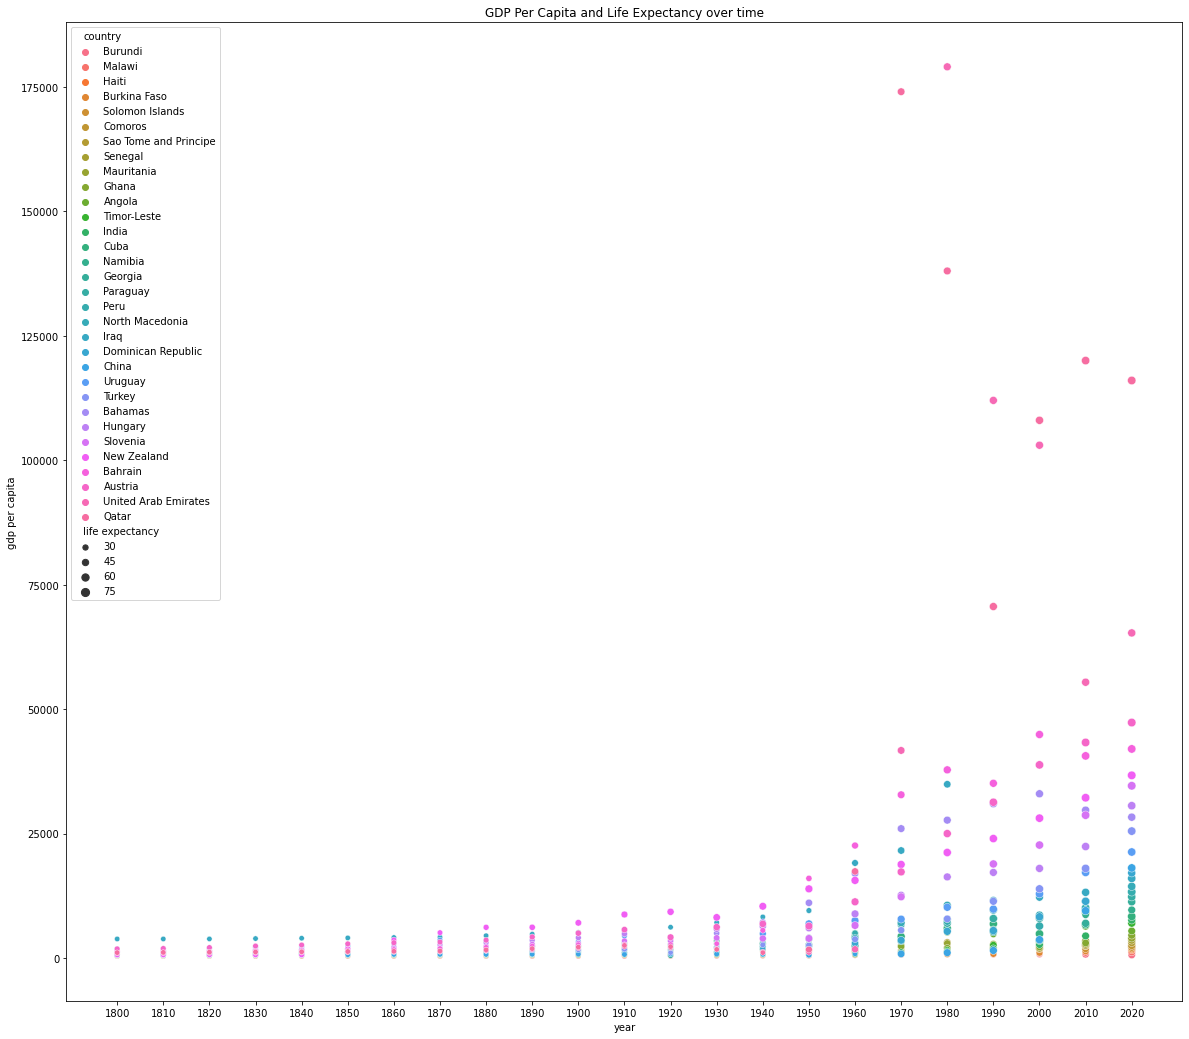

In [11]:
plt.figure(figsize=(20,18))
sns.scatterplot(x="year", 
                y="gdp per capita",
                size="life expectancy",
                data=df,
                hue='country').set_title('GDP Per Capita and Life Expectancy over time')

Hmm, it looks like the bubble sizes are barely distinguishable. Luckily, the function takes an another parameter, sizes, that takes in a list of min and max size values. We'll pass in that list and see how it changes the graph.

Text(0.5, 1.0, 'GDP Per Capita and Life Expectancy over time')

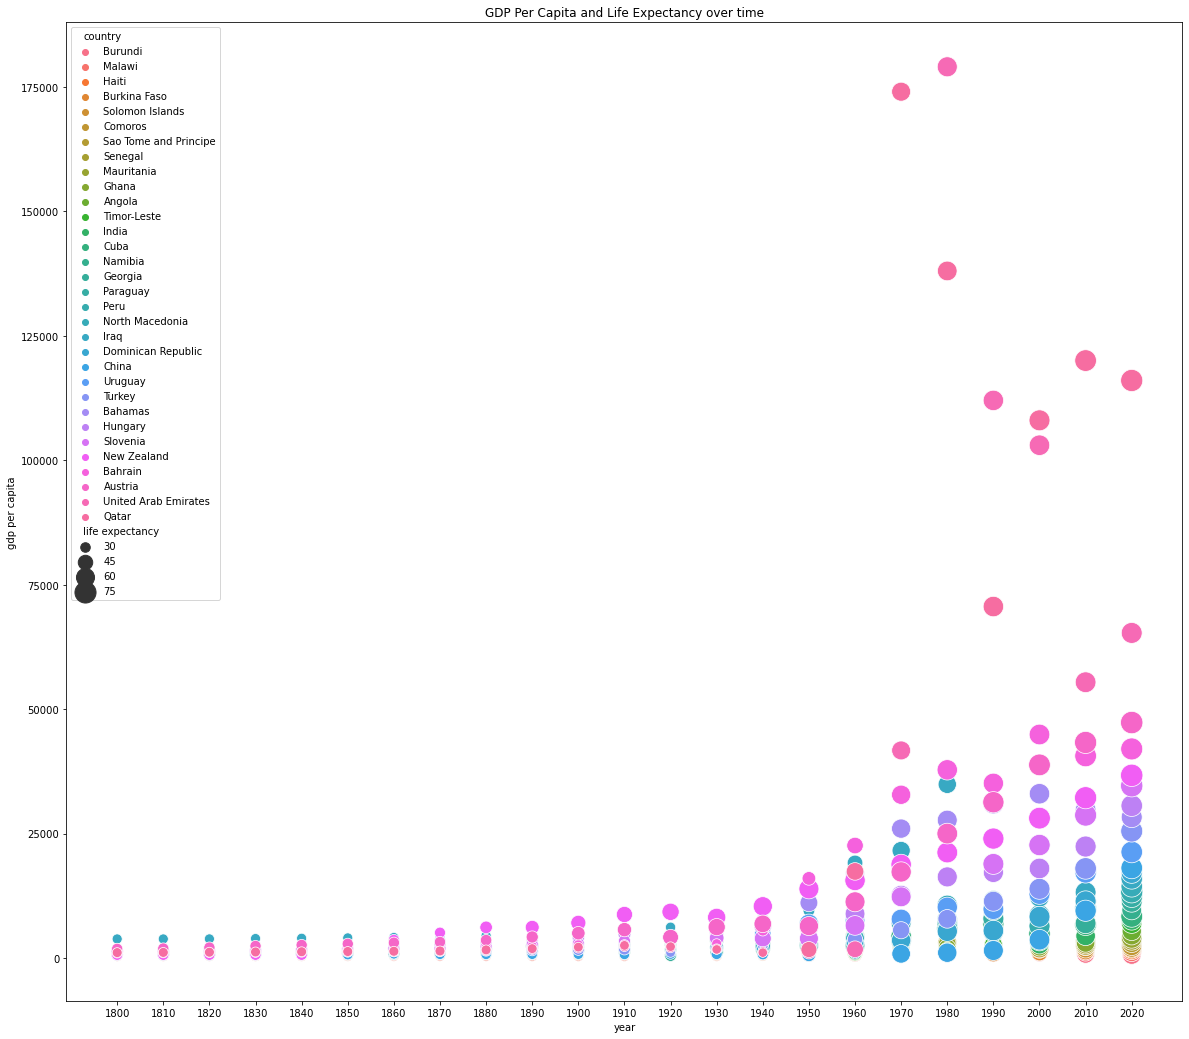

In [12]:
plt.figure(figsize=(20,18))
sns.scatterplot(x="year", 
                y="gdp per capita",
                size="life expectancy",
                sizes=(0, 500),
                data=df,
                hue='country').set_title('GDP Per Capita and Life Expectancy over time')

## Conclusion

That is better. We can visually learn a number of things from this graph. First, the bubble plot allows us to see the trend between the year and the gdp per capita. We see that the changes seem exponential. Second, we see that the life expectancy improves as GDP per capita improves, regardless of how much it changes. Finally, we see the discrepancy between the 'rich' countries and the rest. Rich countries seem to be leading far ahead in terms of GDP per capita in 2020. Overall, the graph tells us many information about the relationship and the dimensions in the data. The limitation of this graph is also apparent here. You probably don't want to include too many bubble categories like in this graph if the data for it is not spread enough. This is a trial-an-error process. Ideally, to improve upon this graph, I would have to further reduce the number of countries down and be more selective in my criteria in choosing which countries to display.